In [15]:
import os
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from astropy import units as u 
from astropy.table import Table

from snewpy.neutrino import ThreeFlavor, MassHierarchy, MixingParameters, ThreeFlavorMixingParameters
from snewpy.models import Nakazato_2013 
from snewpy.models.ccsn import Fornax_2022
from snewpy.models.ccsn import Bollig_2016
from snewpy.models.ccsn import Sukhbold_2015
from snewpy.flavor_transformation import AdiabaticMSW, NonAdiabaticMSWH, \
                                         TwoFlavorDecoherence, ThreeFlavorDecoherence, \
                                         NeutrinoDecay, AdiabaticMSWes, NonAdiabaticMSWes, QuantumDecoherence
from asteria import set_rcparams
from asteria.simulation import Simulation


set_rcparams()
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
%matplotlib inline

C:\Users\sanya\AppData\Local\Temp\ipykernel_45192\876232237.py:11: FutureWarning: snewpy.models.Nakazato_2013 is moved to snewpy.models.ccsn.Nakazato_2013
  from snewpy.models import Nakazato_2013


In [2]:
model = Nakazato_2013(progenitor_mass=13.0*u.solMass,revival_time=300*u.ms,metallicity=.02,eos='shen')

nakazato-shen-z0.02-t_rev300ms-s13.0.fits:   0%|          | 0.00/36.6k [00:00<?, ?iB/s]

In [3]:
nak_params_z2 = list(params for params in Nakazato_2013.get_param_combinations() if params['metallicity'] == 0.02)
nak_params_z4 = list(params for params in Nakazato_2013.get_param_combinations() if params['metallicity'] == 0.004)

In [4]:
sukh_params = list(params for params in Sukhbold_2015.get_param_combinations())

In [13]:
sukh_params

[{'progenitor_mass': <Quantity 27. solMass>, 'eos': 'LS220'},
 {'progenitor_mass': <Quantity 27. solMass>, 'eos': 'SFHo'},
 {'progenitor_mass': <Quantity 9.6 solMass>, 'eos': 'LS220'},
 {'progenitor_mass': <Quantity 9.6 solMass>, 'eos': 'SFHo'}]

In [5]:
sukh_models=[]
for param in sukh_params:
    sukh_models.append(Sukhbold_2015(**param))

In [6]:
nak_models_z2=[]
nak_models_z4=[]
for param in nak_params_z2:
    nak_models_z2.append(Nakazato_2013(**param))
    
for param in nak_params_z4:
    nak_models_z4.append(Nakazato_2013(**param))

nakazato-shen-z0.02-t_rev100ms-s13.0.fits:   0%|          | 0.00/36.6k [00:00<?, ?iB/s]

nakazato-shen-z0.02-t_rev200ms-s13.0.fits:   0%|          | 0.00/36.6k [00:00<?, ?iB/s]

nakazato-shen-z0.02-t_rev100ms-s20.0.fits:   0%|          | 0.00/36.6k [00:00<?, ?iB/s]

nakazato-shen-z0.02-t_rev200ms-s20.0.fits:   0%|          | 0.00/36.6k [00:00<?, ?iB/s]

nakazato-shen-z0.02-t_rev300ms-s20.0.fits:   0%|          | 0.00/36.6k [00:00<?, ?iB/s]

nakazato-shen-z0.02-t_rev100ms-s30.0.fits:   0%|          | 0.00/36.6k [00:00<?, ?iB/s]

nakazato-shen-z0.02-t_rev200ms-s30.0.fits:   0%|          | 0.00/36.6k [00:00<?, ?iB/s]

nakazato-shen-z0.02-t_rev300ms-s30.0.fits:   0%|          | 0.00/36.6k [00:00<?, ?iB/s]

nakazato-shen-z0.02-t_rev100ms-s50.0.fits:   0%|          | 0.00/36.6k [00:00<?, ?iB/s]

nakazato-shen-z0.02-t_rev200ms-s50.0.fits:   0%|          | 0.00/36.6k [00:00<?, ?iB/s]

nakazato-shen-z0.02-t_rev300ms-s50.0.fits:   0%|          | 0.00/36.6k [00:00<?, ?iB/s]

nakazato-shen-z0.004-t_rev100ms-s13.0.fits:   0%|          | 0.00/36.6k [00:00<?, ?iB/s]

nakazato-shen-z0.004-t_rev200ms-s13.0.fits:   0%|          | 0.00/36.6k [00:00<?, ?iB/s]

nakazato-shen-z0.004-t_rev300ms-s13.0.fits:   0%|          | 0.00/36.6k [00:00<?, ?iB/s]

nakazato-shen-z0.004-t_rev200ms-s20.0.fits:   0%|          | 0.00/36.6k [00:00<?, ?iB/s]

nakazato-shen-z0.004-t_rev300ms-s20.0.fits:   0%|          | 0.00/36.6k [00:00<?, ?iB/s]

nakazato-LS220-BH-z0.004-s30.0.fits:   0%|          | 0.00/368k [00:00<?, ?iB/s]

nakazato-shen-BH-z0.004-s30.0.fits:   0%|          | 0.00/698k [00:00<?, ?iB/s]

nakazato-togashi-BH-z0.004-s30.0.fits:   0%|          | 0.00/551k [00:00<?, ?iB/s]

nakazato-shen-z0.004-t_rev100ms-s50.0.fits:   0%|          | 0.00/36.6k [00:00<?, ?iB/s]

nakazato-shen-z0.004-t_rev200ms-s50.0.fits:   0%|          | 0.00/36.6k [00:00<?, ?iB/s]

nakazato-shen-z0.004-t_rev300ms-s50.0.fits:   0%|          | 0.00/36.6k [00:00<?, ?iB/s]

In [10]:
mass = []
for i,m in enumerate(Fornax_2022.param['progenitor_mass'][::25]):
    mass.append(m)

forn_params = list(params for params in Fornax_2022.get_param_combinations() if params['progenitor_mass'] in mass)

In [11]:
forn_models=[]
for param in forn_params:
    forn_models.append(Fornax_2022(**param))

In [7]:
E_vals=np.linspace(0,50,100)
t_vals=np.linspace(0,1000,500)

In [8]:
Energies = E_vals * u.MeV
times=t_vals*u.ms

In [9]:
spectra=[]
for i,t in enumerate(t_vals*u.ms):
    ispec=forn_models[0].get_initial_spectra(t,Energies)
    spectra.append(ispec[Flavor(2)][0])

NameError: name 'forn_models' is not defined

C:\Users\sanya\AppData\Local\Temp\ipykernel_75716\1352219379.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.hist2d(T_flat, E_flat, weights=fluxes_flat, bins=np.array(np.shape(spectra)), cmap='viridis')


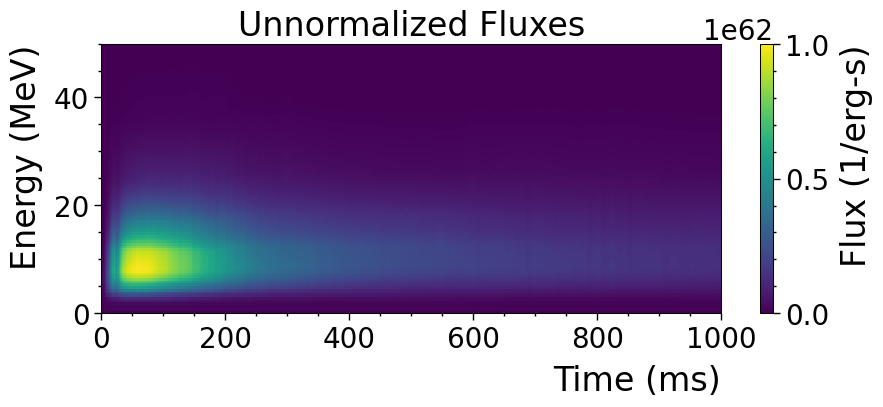

In [195]:
T, E = np.meshgrid(t_vals,E_vals)
T_flat = T.flatten()
E_flat = E.flatten()
fluxes_flat = spectra.T.flatten()
plt.figure(figsize=(10, 3.5))
plt.hist2d(T_flat, E_flat, weights=fluxes_flat, bins=np.array(np.shape(spectra)), cmap='viridis')
plt.colorbar(label='Flux (1/erg-s)')
plt.xlabel('Time (ms)')
plt.ylabel('Energy (MeV)')
plt.title('Unnormalized Fluxes')
plt.show()

In [194]:
spectra=np.array(spectra)

In [97]:
np.shape(spectra)

(500, 100)

In [15]:
def get_fluxes(t_vals,E_vals,model):
    spectra=[]
    for i,t in enumerate(t_vals*u.ms):
        ispec=model.get_initial_spectra(t,E_vals*u.MeV)
        spectra.append(ispec[Flavor(2)])
        
    T, E = np.meshgrid(t_vals,E_vals)
    T_flat = T.flatten()
    E_flat = E.flatten()
    spectra=np.array(spectra)
    
    max_fluxes = np.max(spectra, axis=1) 
    normalized_fluxes = spectra / max_fluxes[:, np.newaxis]
    normalized_fluxes_flat=normalized_fluxes.T.flatten()
    
    max_energies = np.zeros(t_vals.shape)
    for i in range(spectra.shape[0]):
        closest_index = np.argmin(np.abs(spectra[i, :] - max_fluxes[i]))
        max_energies[i] = E_vals[closest_index]
        
    return T_flat,E_flat,normalized_fluxes_flat,max_energies

In [12]:
def get_transformed_fluxes(t_vals,E_vals,model,transformation):
    spectra=[]
    for i,t in enumerate(t_vals*u.ms):
        ispec=model.get_transformed_spectra(t,E_vals*u.MeV,transformation)
        spectra.append(ispec[ThreeFlavor(1)])
        
    T, E = np.meshgrid(t_vals,E_vals)
    T_flat = T.flatten()
    E_flat = E.flatten()
    spectra=np.array(spectra)
    
    max_fluxes = np.max(spectra, axis=1) 
    normalized_fluxes = spectra / max_fluxes[:, np.newaxis]
    normalized_fluxes_flat=normalized_fluxes.T.flatten()
    
    max_energies = np.zeros(t_vals.shape)
    for i in range(spectra.shape[0]):
        closest_index = np.argmin(np.abs(spectra[i, :] - max_fluxes[i]))
        max_energies[i] = E_vals[closest_index]
        
    return T_flat,E_flat,normalized_fluxes_flat,max_energies

In [11]:
ThreeFlavor(1)

<ThreeFlavor.NU_E_BAR: 1>

In [5]:
import numpy as np
np.log(.9)

-0.10536051565782628

In [6]:
ratios=np.load('sukh_sfho_nh_energy_ratios_1_iter.npz',allow_pickle=True)['arr_0']

In [30]:
np.linspace(.8,.8,10)

array([0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8])

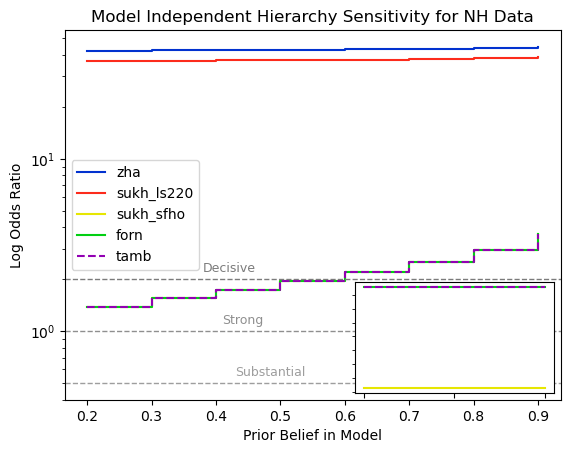

In [46]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

prior_list=np.linspace(.2,.9,8)
colors=['#0232cf','#fc2b1c','#e6e602','#02cf13','#9200b3']
names=['zha','sukh_ls220','sukh_sfho','forn','tamb',]
linestyles=['-','-','-','-','--']
for i,mod_name in enumerate(names):
    plt.step(prior_list,ratios[mod_name][0][0],color=colors[i],where='post',label=mod_name, linestyle=linestyles[i])
plt.legend()
#plt.axhline(y=0, color='grey', linestyle='--', linewidth=1)
plt.title('Model Independent Hierarchy Sensitivity for NH Data')
plt.xlabel('Prior Belief in Model')
plt.ylabel('Log Odds Ratio')
plt.axhline(y=2, color='#7B7B7B', linestyle='--', linewidth=1)
plt.axhline(y=1, color='#8F8F8F', linestyle='--', linewidth=1)
plt.axhline(y=.5, color='#9E9E9E', linestyle='--', linewidth=1)
plt.text(.38,2.2,'Decisive',fontsize=9,color='#7B7B7B')
plt.text(.41,1.1,'Strong',fontsize=9,color='#8F8F8F')
plt.text(.43,.55,'Substantial',fontsize=9,color='#9E9E9E')
plt.yscale('log')



ax_inset = inset_axes(plt.gca(), width="40%", height="30%", loc='lower right')
for i, mod_name in enumerate(names[-3:]):  # Last three models
    ax_inset.step(np.linspace(.8,.9,10), 
                  np.linspace(ratios[mod_name][0][0][-1], ratios[mod_name][0][0][-1],10),
                  color=colors[i+2], where='post', linestyle=linestyles[i+2])

# Customize the inset
#ax_inset.set_xlim(0.2, 0.9)  # Same x-axis range as the main plot
#ax_inset.set_ylim(1.38, 3.67)  # Set y-axis limits to focus on the region of interest
ax_inset.set_yscale('log')
ax_inset.tick_params(axis='y', which='both', labelleft=False)
ax_inset.tick_params(axis='x', which='both', labelbottom=False)

In [40]:
3.6635616461296467-3.663561646129558

8.881784197001252e-14

In [39]:
logsumexp([-3.6888794541139367, -3.6888794541139367, -0.10536051565782628, -3.6888794541139367, -37.968407024789265])-logsumexp([-50.979795447102795, -70.10401573701779, -83.189853686569, -245.93978528023695, -3.6888794541139367])

3.6635616461296467

In [17]:
def get_fluxes_fornax(t_vals,E_vals,model):
    spectra=[]
    for i,t in enumerate(t_vals*u.ms):
        ispec=model.get_initial_spectra(t,E_vals*u.MeV)
        spectra.append(ispec[Flavor(2)][0])
        
    T, E = np.meshgrid(t_vals,E_vals)
    T_flat = T.flatten()
    E_flat = E.flatten()
    spectra=np.array(spectra)
    
    max_fluxes = np.max(spectra, axis=1) 
    normalized_fluxes = spectra / max_fluxes[:, np.newaxis]
    normalized_fluxes_flat=normalized_fluxes.T.flatten()
    
    max_energies = np.zeros(t_vals.shape)
    for i in range(spectra.shape[0]):
        closest_index = np.argmin(np.abs(spectra[i, :] - max_fluxes[i]))
        max_energies[i] = E_vals[closest_index]
        
    return T_flat,E_flat,normalized_fluxes_flat,max_energies

In [31]:
def get_transformed_fluxes_fornax(t_vals,E_vals,model,transformation):
    spectra=[]
    for i,t in enumerate(t_vals*u.ms):
        ispec=model.get_transformed_spectra(t,E_vals*u.MeV,transformation)
        spectra.append(ispec[Flavor(2)][0])
        
    T, E = np.meshgrid(t_vals,E_vals)
    T_flat = T.flatten()
    E_flat = E.flatten()
    spectra=np.array(spectra)
    
    max_fluxes = np.max(spectra, axis=1) 
    normalized_fluxes = spectra / max_fluxes[:, np.newaxis]
    normalized_fluxes_flat=normalized_fluxes.T.flatten()
    
    max_energies = np.zeros(t_vals.shape)
    for i in range(spectra.shape[0]):
        closest_index = np.argmin(np.abs(spectra[i, :] - max_fluxes[i]))
        max_energies[i] = E_vals[closest_index]
        
    return T_flat,E_flat,normalized_fluxes_flat,max_energies

C:\Users\sanya\AppData\Local\Temp\ipykernel_11052\2968721830.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax.hist2d(T_flat, E_flat, weights=normalized_fluxes_flat, bins=[500,100], cmap='viridis')
C:\Users\sanya\AppData\Local\Temp\ipykernel_11052\2968721830.py:24: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(hist[3], cax=cax, label='Flux (1/erg-s)')


Text(0.5, 0.98, 'Normalized Fluxes for Nakazato with z=.02, Unmixed')

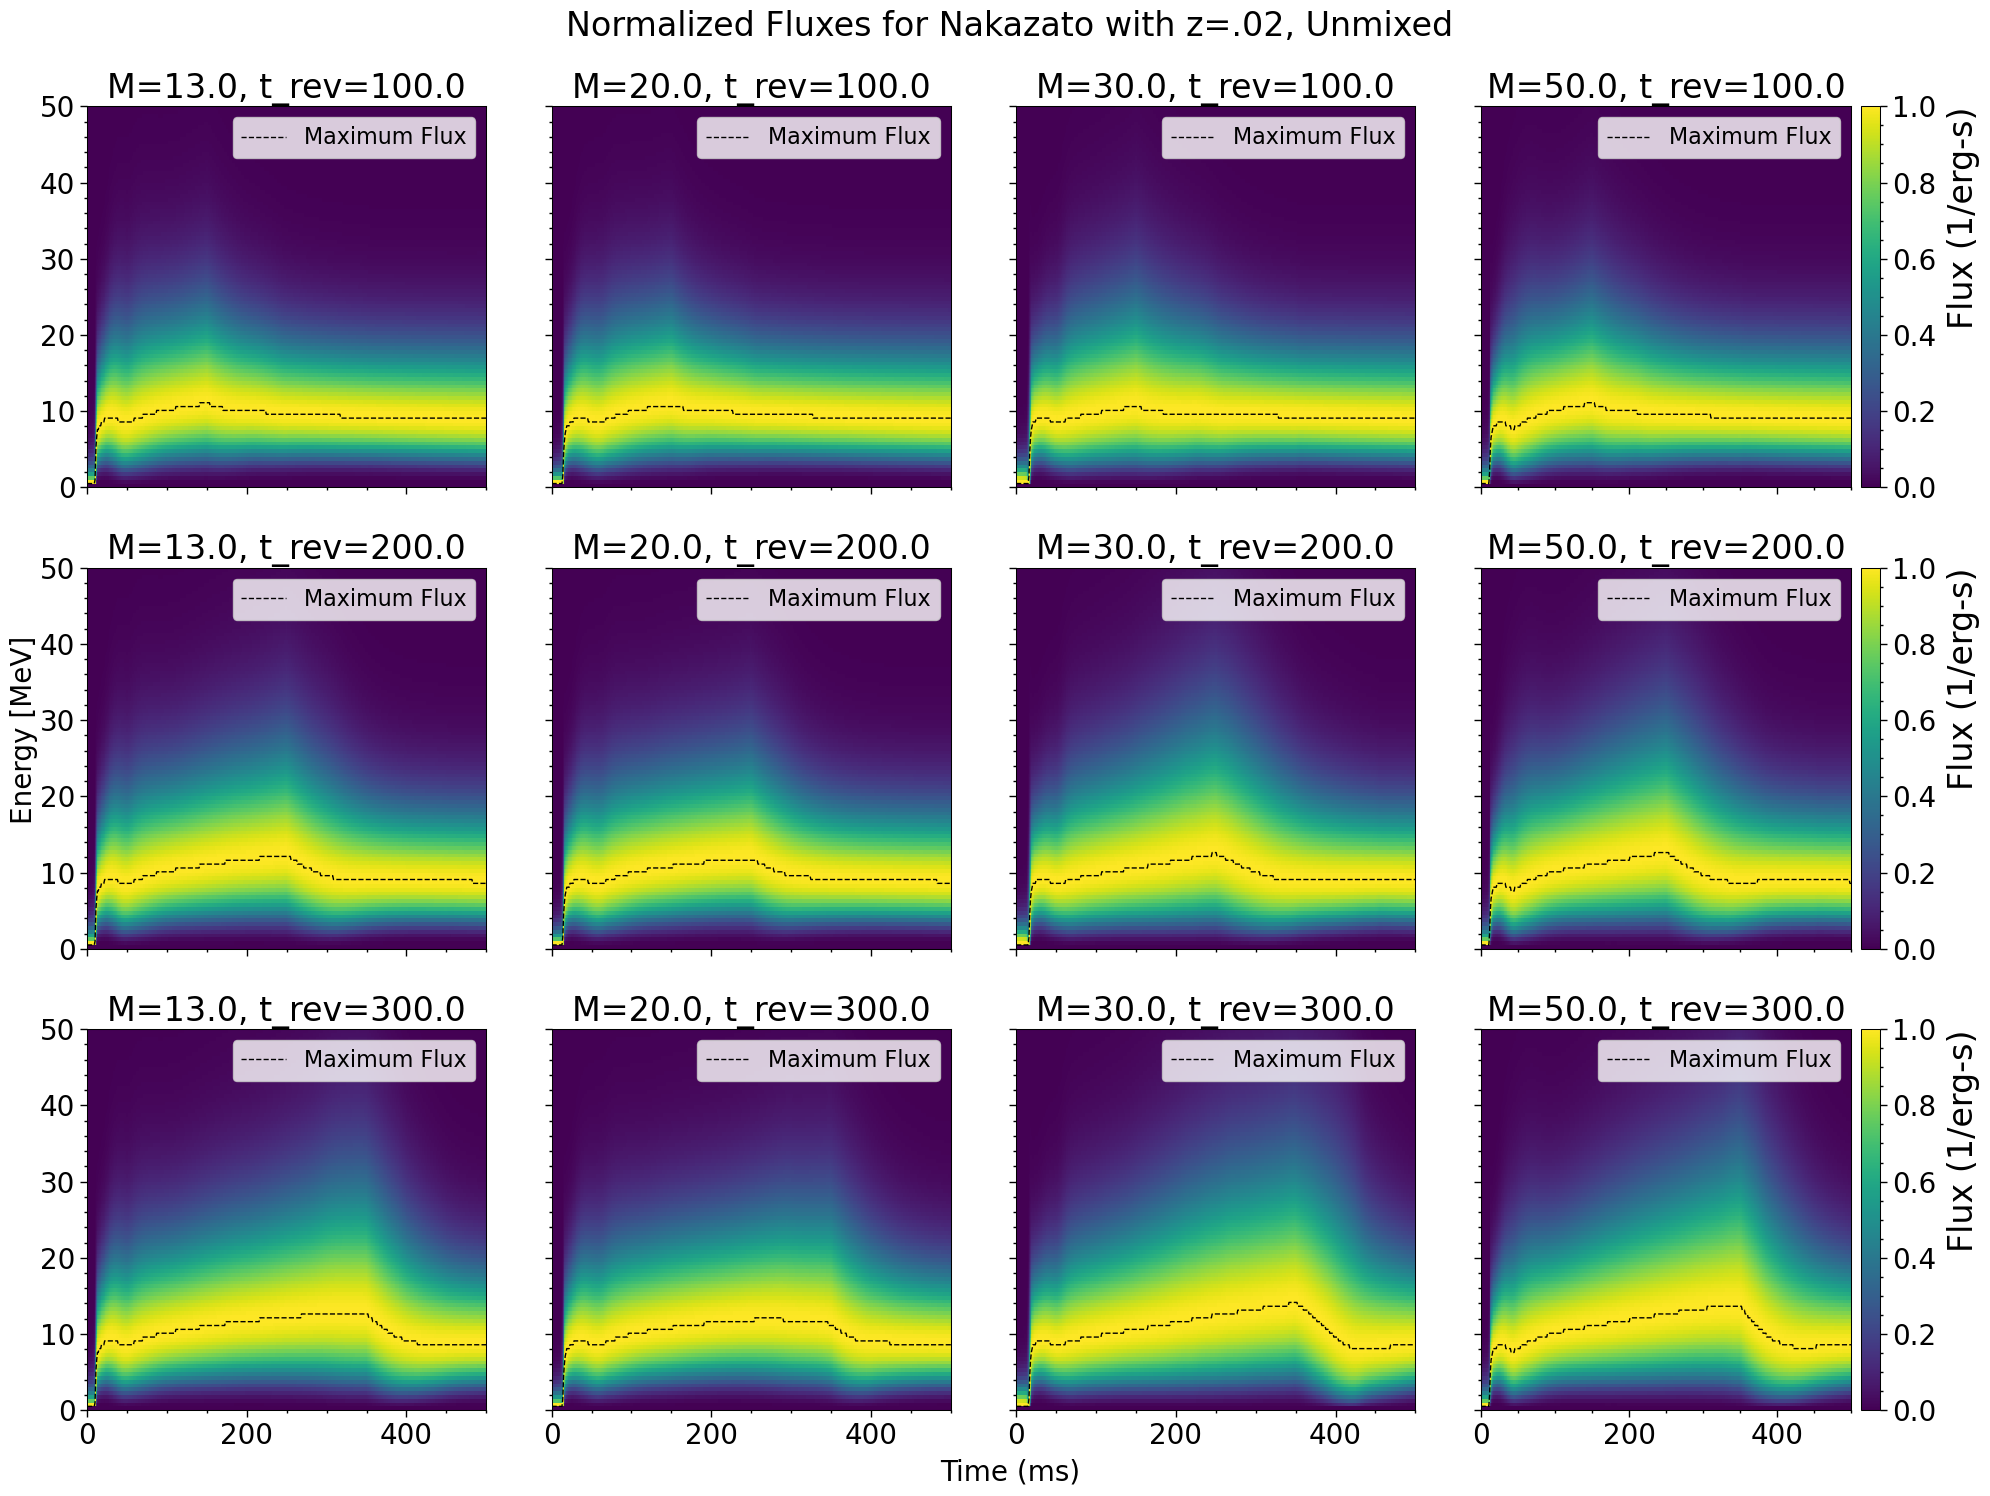

In [23]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

E_vals=np.linspace(0,50,100)
t_vals=np.linspace(0,500,500)
fig, axes = plt.subplots(3,4, figsize=(20,15), sharex=True, sharey=True,tight_layout=True)

counts=0
for i in range(4):
    for j in range(3):
        ax=axes[j,i]
        mod=nak_models_z2[counts]
        T_flat, E_flat, normalized_fluxes_flat, max_energies = get_fluxes(t_vals,E_vals,mod)
        ax.hist2d(T_flat, E_flat, weights=normalized_fluxes_flat, bins=[500,100], cmap='viridis')
        hist = ax.hist2d(T_flat, E_flat, weights=normalized_fluxes_flat, bins=[500, 100], cmap='viridis')
        ax.plot(t_vals,max_energies,color='black',lw=1,ls='--',label='Maximum Flux')
        ax.set_title('M={}, t_rev={}'.format(nak_params_z2[counts]['progenitor_mass'].value,
                                            nak_params_z2[counts]['revival_time'].value))
        ax.legend()
        counts+=1

for i in range(3):
    divider = make_axes_locatable(axes[i,-1])
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar = fig.colorbar(hist[3], cax=cax, label='Flux (1/erg-s)')
        
fig.text(0.5, 0., 'Time (ms)', ha='center')
fig.text(0., 0.5, 'Energy [MeV]', va='center', rotation='vertical');
fig.suptitle('Normalized Fluxes for Nakazato with z=.02, Unmixed')

C:\Users\sanya\AppData\Local\Temp\ipykernel_11052\744324035.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax.hist2d(T_flat, E_flat, weights=normalized_fluxes_flat, bins=[500,100], cmap='viridis')
C:\Users\sanya\AppData\Local\Temp\ipykernel_11052\744324035.py:25: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(hist[3], cax=cax, label='Flux (1/erg-s)')


Text(0.5, 0.98, 'Normalized Fluxes for Nakazato with z=.02, QuantumDecoherence IMO')

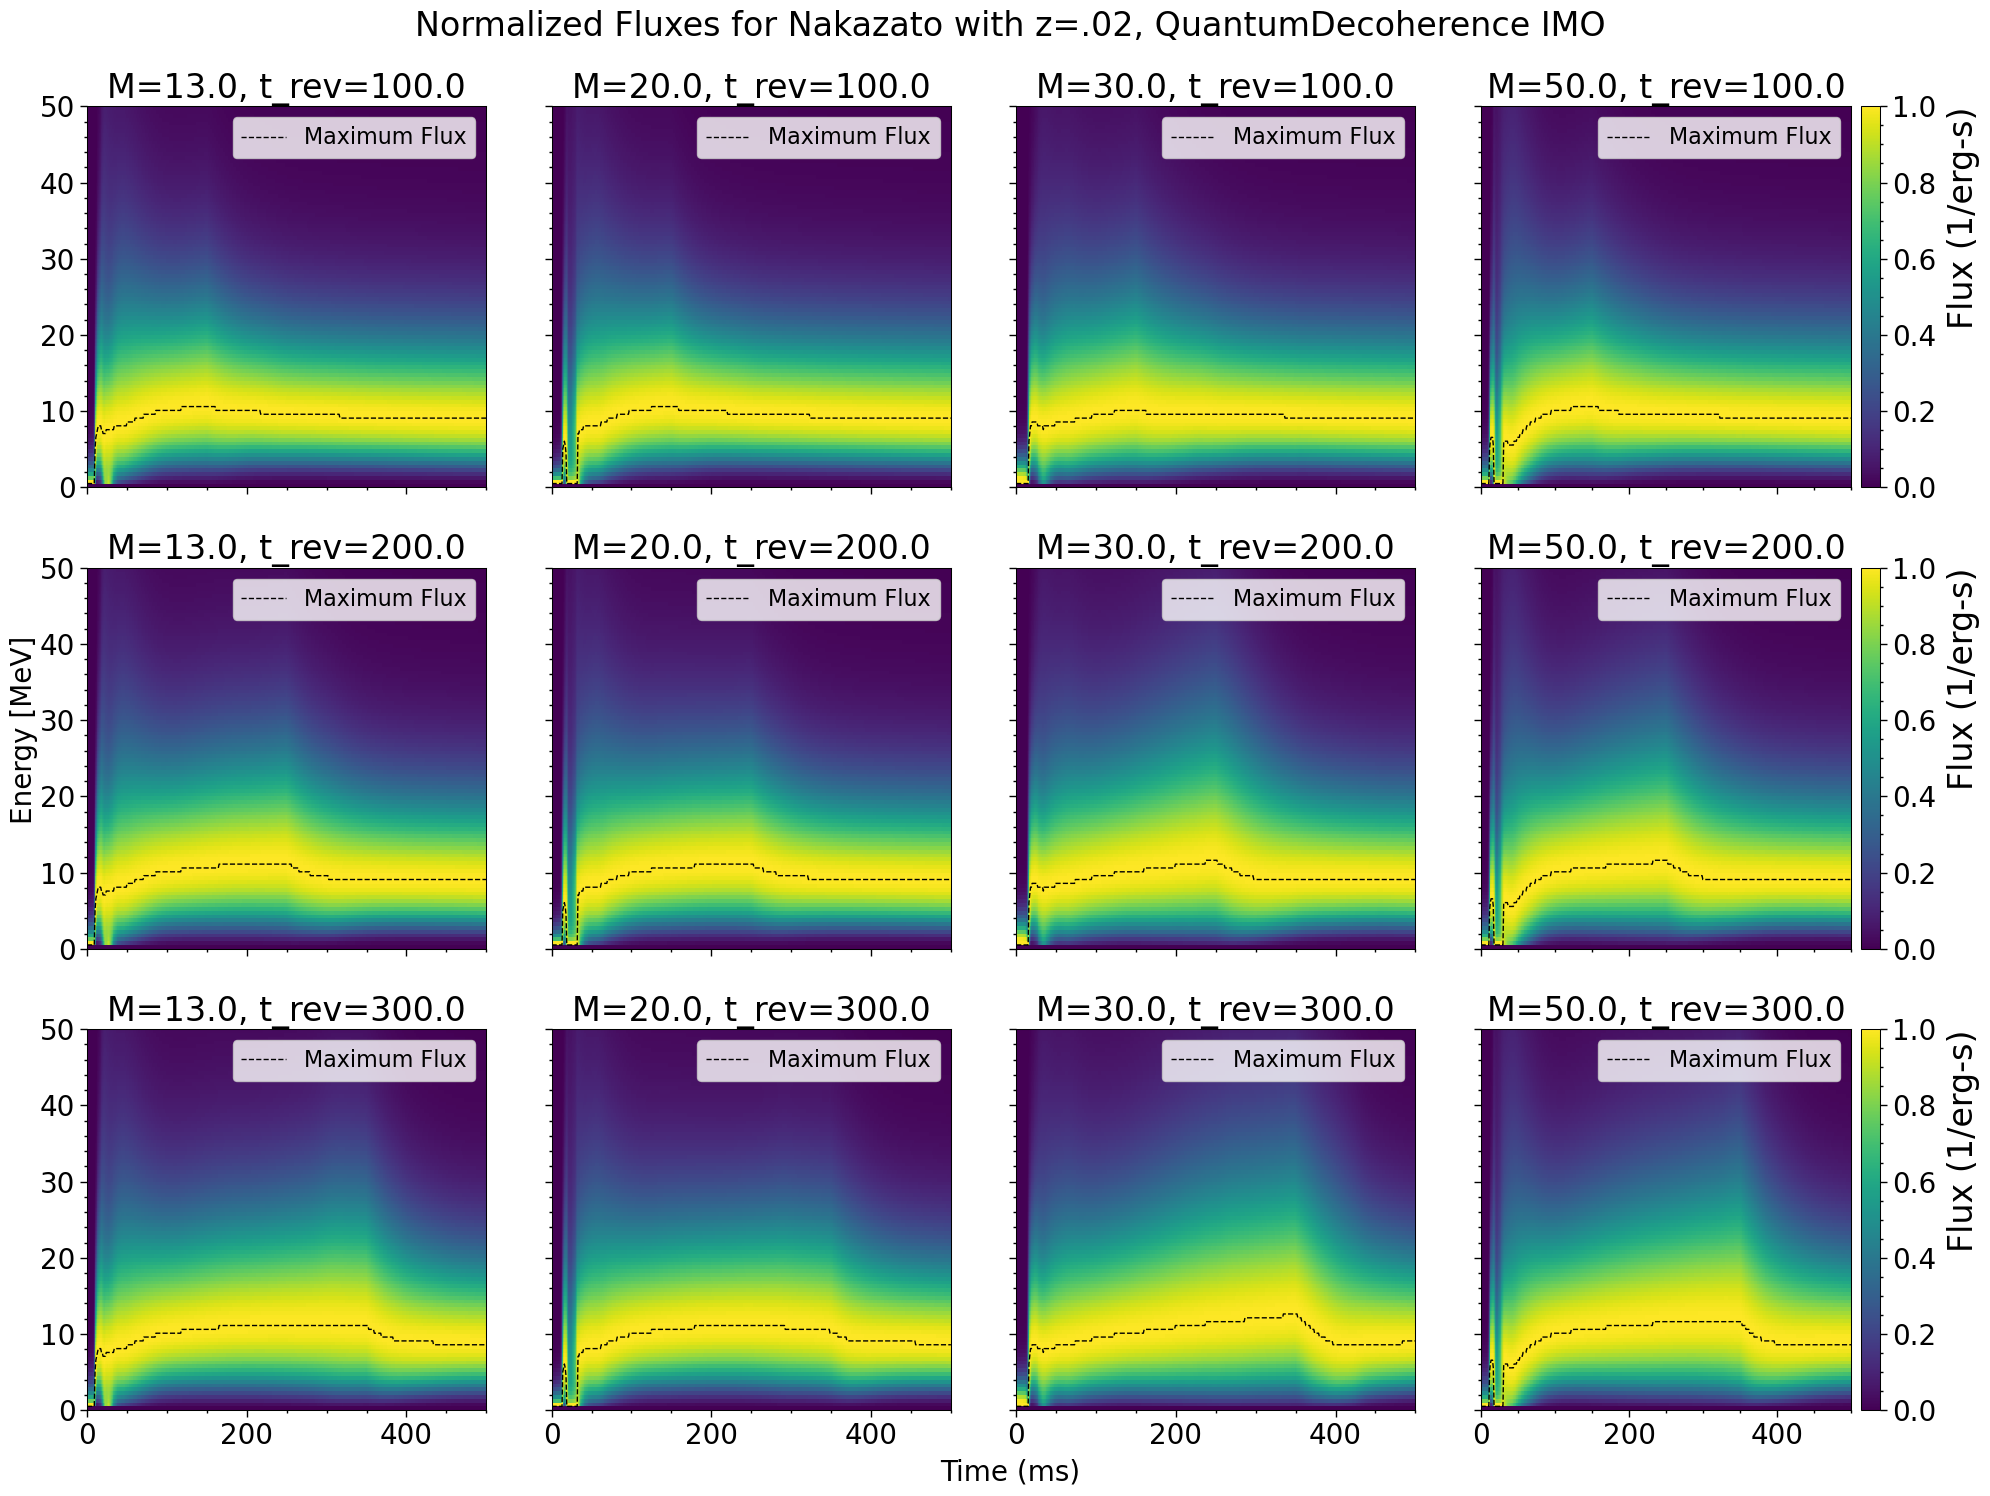

In [40]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

E_vals=np.linspace(0,50,100)
t_vals=np.linspace(0,500,500)
fig, axes = plt.subplots(3,4, figsize=(20,15), sharex=True, sharey=True,tight_layout=True)

counts=0
for i in range(4):
    for j in range(3):
        ax=axes[j,i]
        mod=nak_models_z2[counts]
        T_flat, E_flat, normalized_fluxes_flat, max_energies = get_transformed_fluxes(t_vals,E_vals,mod,
                                                                                      QuantumDecoherence(mh=MassHierarchy.INVERTED))
        ax.hist2d(T_flat, E_flat, weights=normalized_fluxes_flat, bins=[500,100], cmap='viridis')
        hist = ax.hist2d(T_flat, E_flat, weights=normalized_fluxes_flat, bins=[500, 100], cmap='viridis')
        ax.plot(t_vals,max_energies,color='black',lw=1,ls='--',label='Maximum Flux')
        ax.set_title('M={}, t_rev={}'.format(nak_params_z2[counts]['progenitor_mass'].value,
                                            nak_params_z2[counts]['revival_time'].value))
        ax.legend()
        counts+=1

for i in range(3):
    divider = make_axes_locatable(axes[i,-1])
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar = fig.colorbar(hist[3], cax=cax, label='Flux (1/erg-s)')
        
fig.text(0.5, 0., 'Time (ms)', ha='center')
fig.text(0., 0.5, 'Energy [MeV]', va='center', rotation='vertical');
fig.suptitle('Normalized Fluxes for Nakazato with z=.02, QuantumDecoherence IMO')

{'progenitor_mass': <Quantity 20. solMass>, 'revival_time': <Quantity 100. ms>, 'metallicity': 0.02, 'eos': 'shen'}


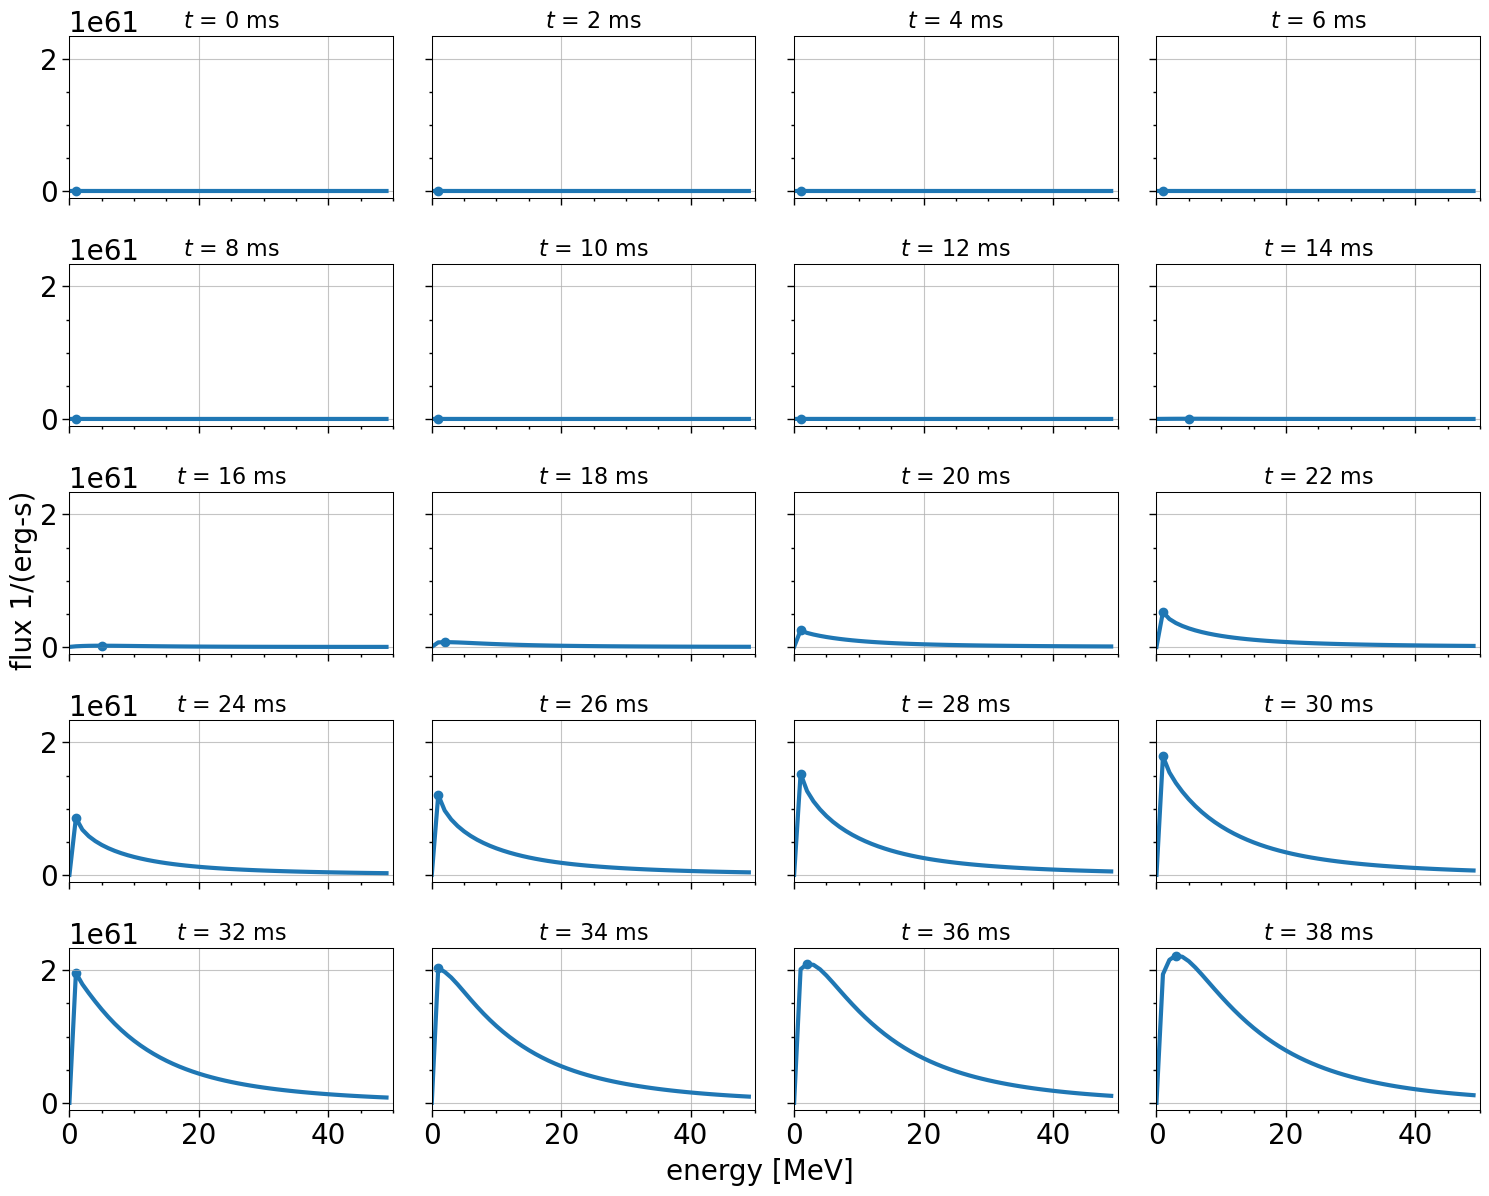

In [22]:
#model = models[23.43*u.solMass]
fig, axes = plt.subplots(5,4, figsize=(15,12), sharex=True, sharey=True, tight_layout=True)

times1 = np.arange(0, 40, 2) * u.ms
E_vals=np.arange(0, 50, 1)
E = np.arange(0, 50, 1) * u.MeV

model=nak_models_z2[3]

spectra=[]
for i,t in enumerate(times1):
    ispec=model.get_transformed_spectra(t,E,NeutrinoDecay())
    spectra.append(ispec[Flavor(2)])
        
spectra=np.array(spectra)
    
max_fluxes = np.max(spectra, axis=1) 
normalized_fluxes = spectra / max_fluxes[:, np.newaxis]
normalized_fluxes_flat=normalized_fluxes.T.flatten()
    
max_energies = np.zeros(t_vals.shape)
for i in range(spectra.shape[0]):
    closest_index = np.argmin(np.abs(spectra[i, :] - max_fluxes[i]))
    max_energies[i] = E_vals[closest_index]

print(nak_params_z2[3])

for i, ax in enumerate(axes.flatten()):
    ax.plot(E, spectra[i], lw=3)
    ax.scatter(max_energies[i],max_fluxes[i])
    ax.set(xlim=(0,50))
    ax.set_title('$t$ = {:g}'.format(times1[i]), fontsize=16)
    
fig.text(0.5, 0., 'energy [MeV]', ha='center')
fig.text(0., 0.5, 'flux 1/(erg-s)', va='center', rotation='vertical');

C:\Users\sanya\AppData\Local\Temp\ipykernel_11052\3920558491.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax.hist2d(T_flat, E_flat, weights=normalized_fluxes_flat, bins=[500,100], cmap='viridis')
C:\Users\sanya\AppData\Local\Temp\ipykernel_11052\3920558491.py:28: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(hist[3], cax=cax, label='Flux (1/erg-s)')


Text(0.5, 0.98, 'Normalized Fluxes for Nakazato with z=.004, Unmixed')

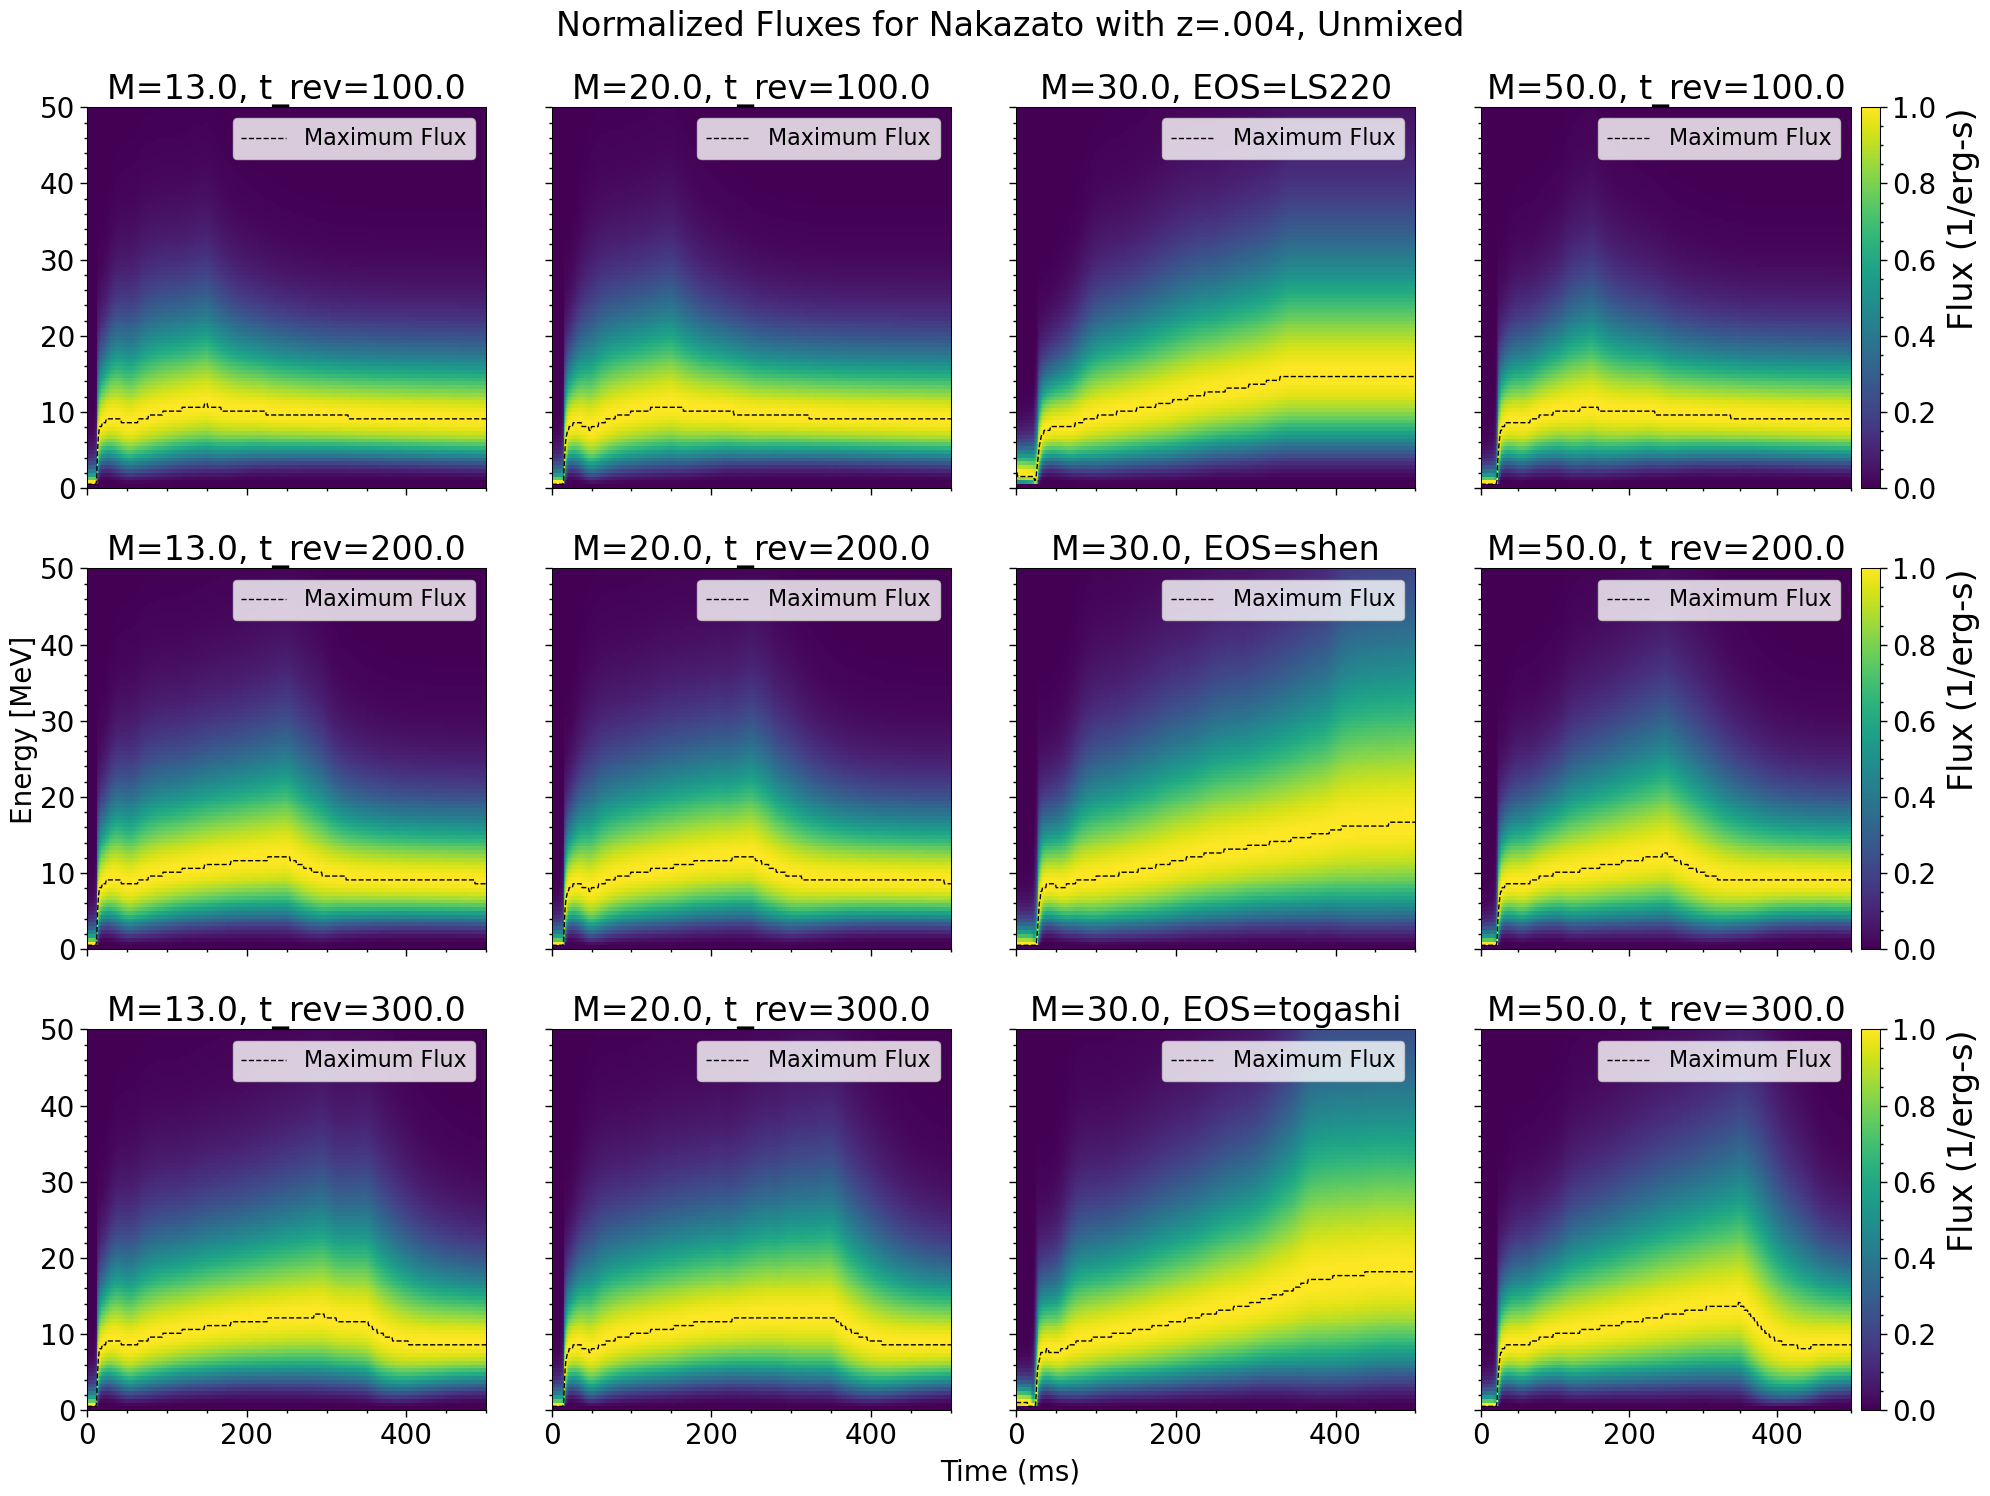

In [25]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

E_vals=np.linspace(0,50,100)
t_vals=np.linspace(0,500,500)
fig, axes = plt.subplots(3,4, figsize=(20,15), sharex=True, sharey=True,tight_layout=True)

counts=0
for i in range(4):
    for j in range(3):
        ax=axes[j,i]
        mod=nak_models_z4[counts]
        T_flat, E_flat, normalized_fluxes_flat, max_energies = get_fluxes(t_vals,E_vals,mod)
        ax.hist2d(T_flat, E_flat, weights=normalized_fluxes_flat, bins=[500,100], cmap='viridis')
        hist = ax.hist2d(T_flat, E_flat, weights=normalized_fluxes_flat, bins=[500, 100], cmap='viridis')
        ax.plot(t_vals,max_energies,color='black',lw=1,ls='--',label='Maximum Flux')
        if(nak_params_z4[counts]['progenitor_mass'].value==30.0):
            ax.set_title('M={}, EOS={}'.format(nak_params_z4[counts]['progenitor_mass'].value,
                                            nak_params_z4[counts]['eos']))
        else:
            ax.set_title('M={}, t_rev={}'.format(nak_params_z4[counts]['progenitor_mass'].value,
                                                nak_params_z4[counts]['revival_time'].value))
        ax.legend()
        counts+=1

for i in range(3):
    divider = make_axes_locatable(axes[i,-1])
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar = fig.colorbar(hist[3], cax=cax, label='Flux (1/erg-s)')
        
fig.text(0.5, 0., 'Time (ms)', ha='center')
fig.text(0., 0.5, 'Energy [MeV]', va='center', rotation='vertical');
fig.suptitle('Normalized Fluxes for Nakazato with z=.004, Unmixed')

C:\Users\sanya\AppData\Local\Temp\ipykernel_75716\3948628235.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax.hist2d(T_flat, E_flat, weights=normalized_fluxes_flat, bins=[500,100], cmap='viridis')
C:\Users\sanya\AppData\Local\Temp\ipykernel_75716\3948628235.py:25: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(hist[3], cax=cax, label='Flux (1/erg-s)')


Text(0.5, 0.98, 'Normalized Fluxes for Nakazato with z=.02, NMO')

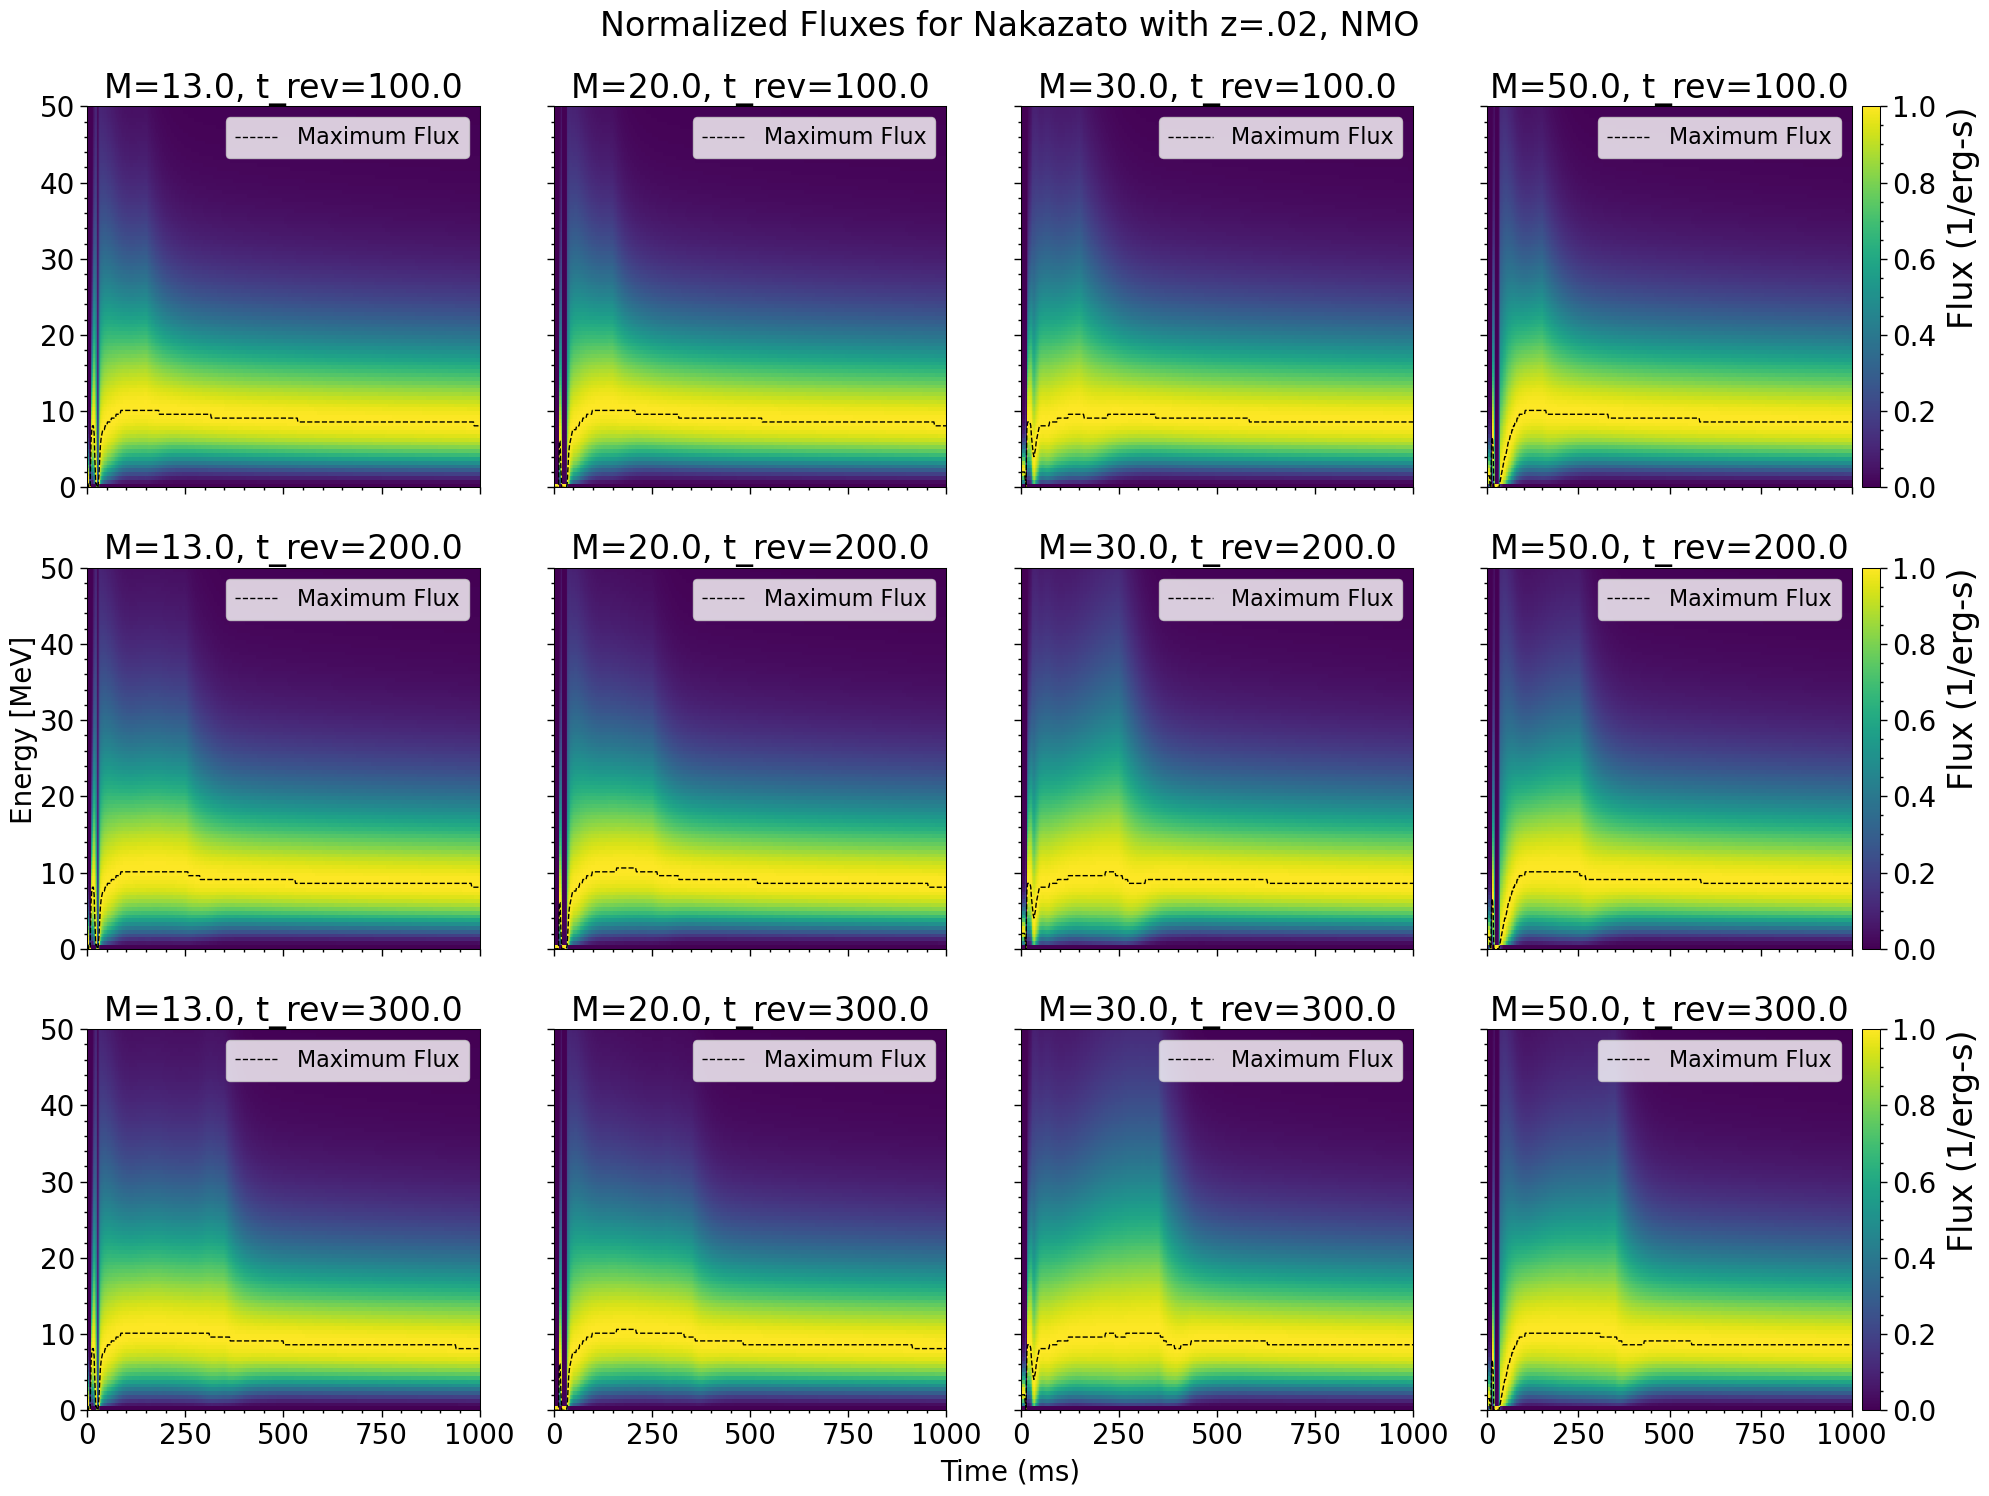

In [208]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

E_vals=np.linspace(0,50,100)
t_vals=np.linspace(0,1000,500)
fig, axes = plt.subplots(3,4, figsize=(20,15), sharex=True, sharey=True,tight_layout=True)

counts=0
for i in range(4):
    for j in range(3):
        ax=axes[j,i]
        mod=nak_models_z2[counts]
        T_flat, E_flat, normalized_fluxes_flat, max_energies = get_transformed_fluxes(t_vals,E_vals,mod,
                                                                                      AdiabaticMSW(mh=MassHierarchy.INVERTED))
        ax.hist2d(T_flat, E_flat, weights=normalized_fluxes_flat, bins=[500,100], cmap='viridis')
        hist = ax.hist2d(T_flat, E_flat, weights=normalized_fluxes_flat, bins=[500, 100], cmap='viridis')
        ax.plot(t_vals,max_energies,color='black',lw=1,ls='--',label='Maximum Flux')
        ax.set_title('M={}, t_rev={}'.format(nak_params_z2[counts]['progenitor_mass'].value,
                                            nak_params_z2[counts]['revival_time'].value))
        ax.legend()
        counts+=1

for i in range(3):
    divider = make_axes_locatable(axes[i,-1])
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar = fig.colorbar(hist[3], cax=cax, label='Flux (1/erg-s)')
        
fig.text(0.5, 0., 'Time (ms)', ha='center')
fig.text(0., 0.5, 'Energy [MeV]', va='center', rotation='vertical');
fig.suptitle('Normalized Fluxes for Nakazato with z=.02, NMO')

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

E_vals=np.linspace(0,50,100)
t_vals=np.linspace(0,500,500)
fig, axes = plt.subplots(3,4, figsize=(20,15), sharex=True, sharey=True,tight_layout=True)

counts=0
for i in range(4):
    for j in range(3):
        ax=axes[j,i]
        mod=nak_models_z4[counts]
        T_flat, E_flat, normalized_fluxes_flat, max_energies = get_transformed_fluxes(t_vals,E_vals,mod,NeutrinoDecay())
        ax.hist2d(T_flat, E_flat, weights=normalized_fluxes_flat, bins=[500,100], cmap='viridis')
        hist = ax.hist2d(T_flat, E_flat, weights=normalized_fluxes_flat, bins=[500, 100], cmap='viridis')
        ax.plot(t_vals,max_energies,color='black',lw=1,ls='--',label='Maximum Flux')
        if(nak_params_z4[counts]['progenitor_mass'].value==30.0):
            ax.set_title('M={}, EOS={}'.format(nak_params_z4[counts]['progenitor_mass'].value,
                                            nak_params_z4[counts]['eos']))
        else:
            ax.set_title('M={}, t_rev={}'.format(nak_params_z4[counts]['progenitor_mass'].value,
                                                nak_params_z4[counts]['revival_time'].value))
        ax.legend()
        counts+=1

for i in range(3):
    divider = make_axes_locatable(axes[i,-1])
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar = fig.colorbar(hist[3], cax=cax, label='Flux (1/erg-s)')
        
fig.text(0.5, 0., 'Time (ms)', ha='center')
fig.text(0., 0.5, 'Energy [MeV]', va='center', rotation='vertical');
fig.suptitle('Normalized Fluxes for Nakazato with z=.004, Neutrino Decay NMO')

In [16]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

E_vals=np.linspace(0,50,100)
t_vals=np.linspace(0,1000,500)
transformation=AdiabaticMSW(**ThreeFlavorMixingParameters)

T_flat, E_flat, normalized_fluxes_flat, max_energies = get_transformed_fluxes(t_vals,E_vals,sukh_models[1],transformation)
plt.hist2d(T_flat, E_flat, weights=normalized_fluxes_flat, bins=[500,100], cmap='viridis')
hist = plt.hist2d(T_flat, E_flat, weights=normalized_fluxes_flat, bins=[500, 100], cmap='viridis')
plt.plot(t_vals,max_energies,color='black',lw=1,ls='--',label='Maximum Flux')
plt.set_title('M={}, EOS={}'.format(sukh_params[counts]['progenitor_mass'].value,
                                            sukh_params[counts]['eos']))
plt.legend()
pkt.colorbar(label='Flux (1/erg-s)')
        
plt.xlabel('Time (ms)')
plt.ylabel('Energy (MeV)');
plt.title('NMO Fluxes for Sukhbold M=27, eos=SFHo')

TypeError: Mapping.keys() missing 1 required positional argument: 'self'

C:\Users\sanya\AppData\Local\Temp\ipykernel_75716\464484755.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax.hist2d(T_flat, E_flat, weights=normalized_fluxes_flat, bins=[500,100], cmap='viridis')
C:\Users\sanya\AppData\Local\Temp\ipykernel_75716\464484755.py:24: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(hist[3], cax=cax, label='Flux (1/erg-s)')


Text(0.5, 0.98, 'Normalized Fluxes for Sukhbold 2015, Unmixed')

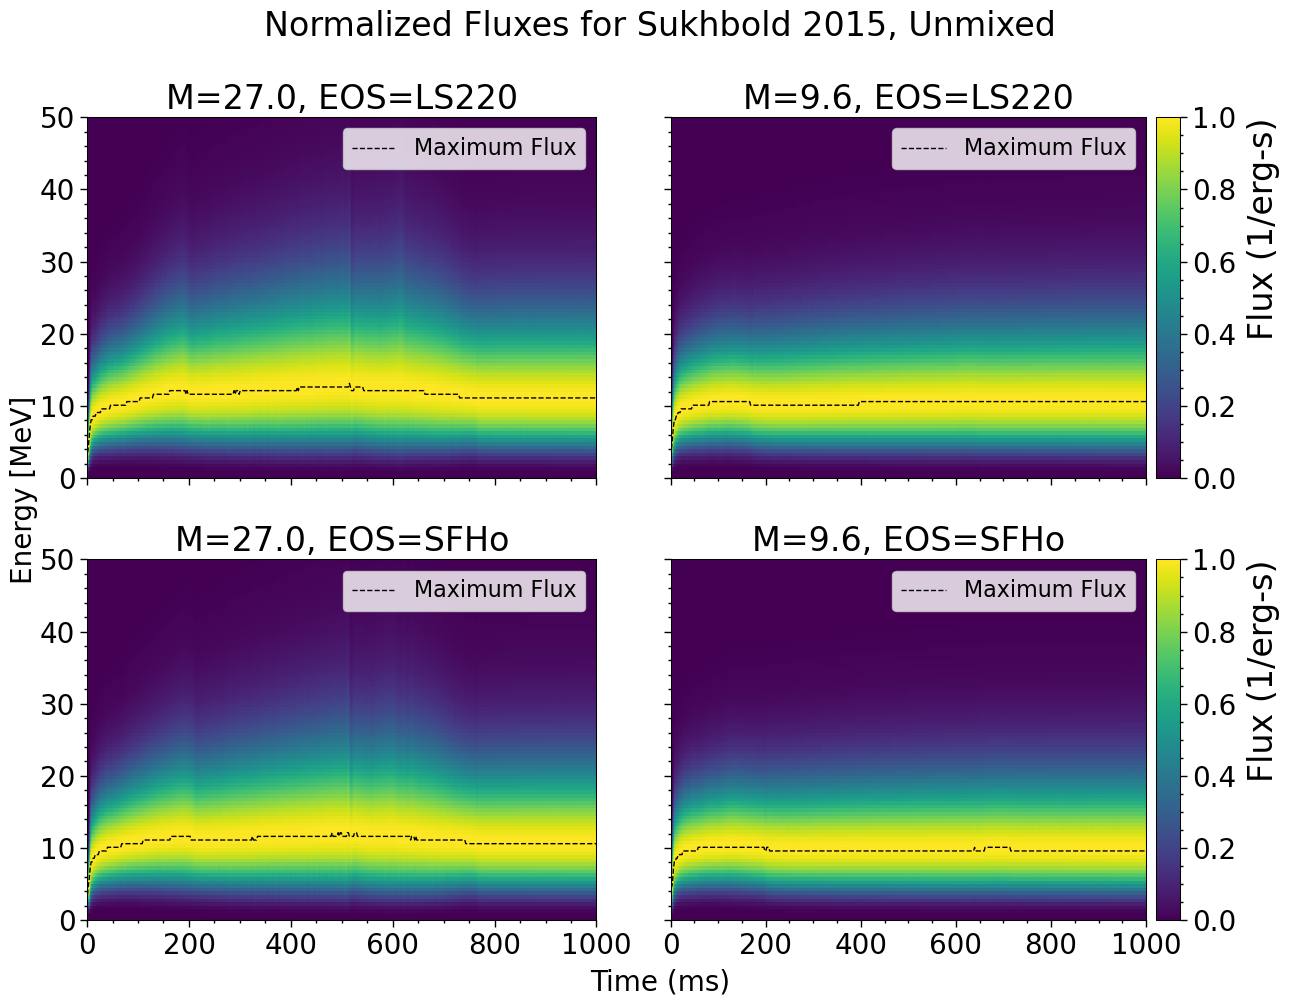

In [199]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

E_vals=np.linspace(0,50,100)
t_vals=np.linspace(0,1000,500)
fig, axes = plt.subplots(2,2, figsize=(13,10), sharex=True, sharey=True,tight_layout=True)

counts=0
for i in range(2):
    for j in range(2):
        ax=axes[j,i]
        mod=sukh_models[counts]
        T_flat, E_flat, normalized_fluxes_flat, max_energies = get_fluxes(t_vals,E_vals,mod)
        ax.hist2d(T_flat, E_flat, weights=normalized_fluxes_flat, bins=[500,100], cmap='viridis')
        hist = ax.hist2d(T_flat, E_flat, weights=normalized_fluxes_flat, bins=[500, 100], cmap='viridis')
        ax.plot(t_vals,max_energies,color='black',lw=1,ls='--',label='Maximum Flux')
        ax.set_title('M={}, EOS={}'.format(sukh_params[counts]['progenitor_mass'].value,
                                            sukh_params[counts]['eos']))
        ax.legend()
        counts+=1

for i in range(2):
    divider = make_axes_locatable(axes[i,-1])
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar = fig.colorbar(hist[3], cax=cax, label='Flux (1/erg-s)')
        
fig.text(0.5, 0., 'Time (ms)', ha='center')
fig.text(0., 0.5, 'Energy [MeV]', va='center', rotation='vertical');
fig.suptitle('Normalized Fluxes for Sukhbold 2015, Unmixed')

C:\Users\sanya\AppData\Local\Temp\ipykernel_11052\368081323.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax.hist2d(T_flat, E_flat, weights=normalized_fluxes_flat, bins=[500,100], cmap='viridis')
C:\Users\sanya\AppData\Local\Temp\ipykernel_11052\368081323.py:25: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(hist[3], cax=cax, label='Flux (1/erg-s)')


Text(0.5, 0.98, 'Normalized Fluxes for Sukhbold 2015, QuantumDecoherence NMO')

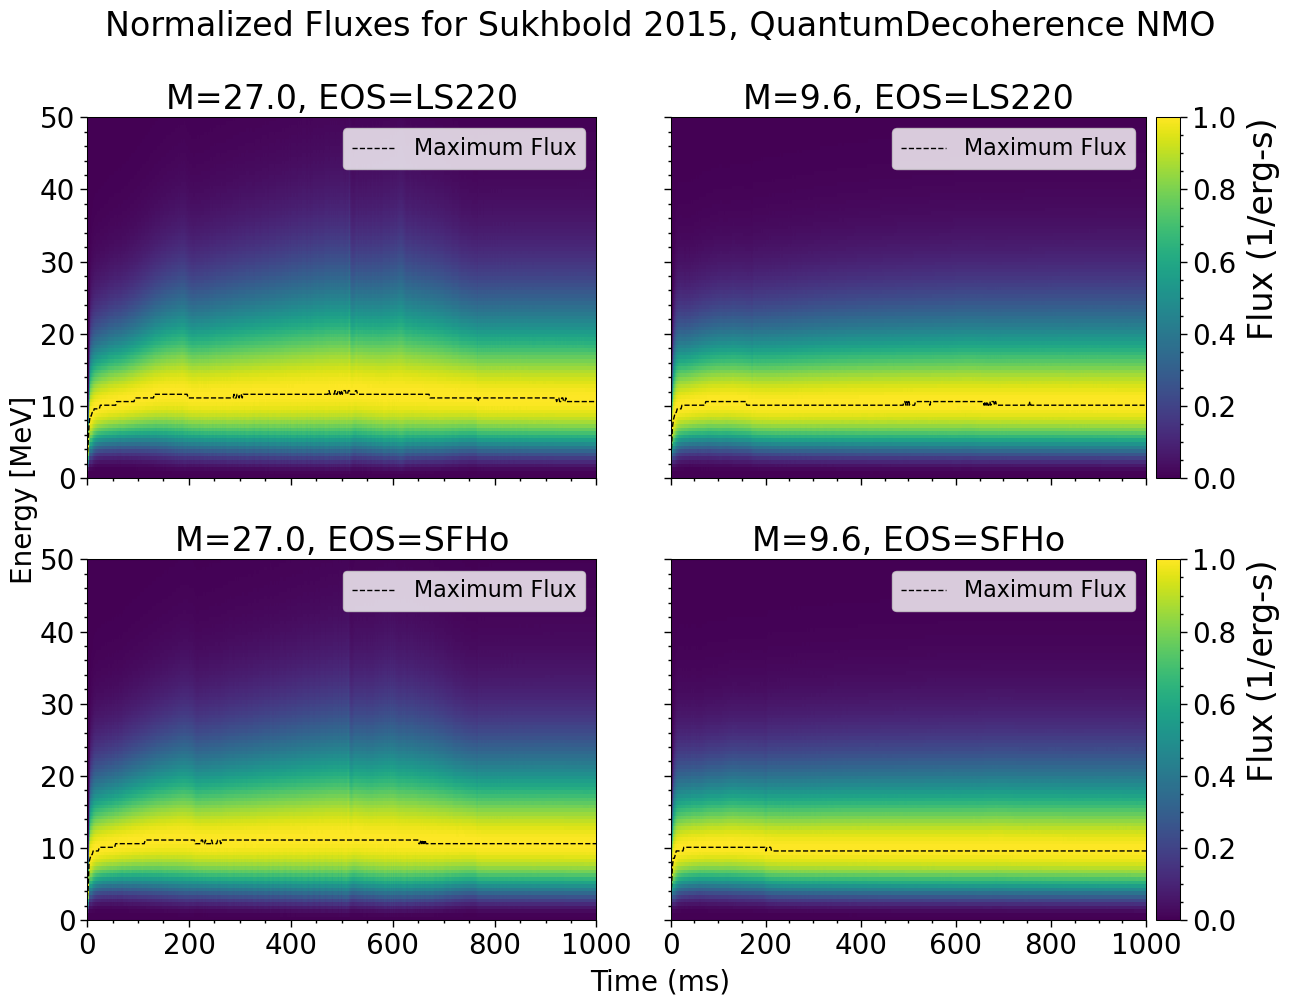

In [42]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

E_vals=np.linspace(0,50,100)
t_vals=np.linspace(0,1000,500)
fig, axes = plt.subplots(2,2, figsize=(13,10), sharex=True, sharey=True,tight_layout=True)

counts=0
for i in range(2):
    for j in range(2):
        ax=axes[j,i]
        mod=sukh_models[counts]
        T_flat, E_flat, normalized_fluxes_flat, max_energies = get_transformed_fluxes(t_vals,E_vals,mod,
                                                                                      QuantumDecoherence())
        ax.hist2d(T_flat, E_flat, weights=normalized_fluxes_flat, bins=[500,100], cmap='viridis')
        hist = ax.hist2d(T_flat, E_flat, weights=normalized_fluxes_flat, bins=[500, 100], cmap='viridis')
        ax.plot(t_vals,max_energies,color='black',lw=1,ls='--',label='Maximum Flux')
        ax.set_title('M={}, EOS={}'.format(sukh_params[counts]['progenitor_mass'].value,
                                            sukh_params[counts]['eos']))
        ax.legend()
        counts+=1

for i in range(2):
    divider = make_axes_locatable(axes[i,-1])
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar = fig.colorbar(hist[3], cax=cax, label='Flux (1/erg-s)')
        
fig.text(0.5, 0., 'Time (ms)', ha='center')
fig.text(0., 0.5, 'Energy [MeV]', va='center', rotation='vertical');
fig.suptitle('Normalized Fluxes for Sukhbold 2015, QuantumDecoherence NMO')

C:\Users\sanya\AppData\Local\Temp\ipykernel_75716\861943039.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax.hist2d(T_flat, E_flat, weights=normalized_fluxes_flat, bins=[500,100], cmap='viridis')
C:\Users\sanya\AppData\Local\Temp\ipykernel_75716\861943039.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(hist[3], cax=cax, label='Flux (1/erg-s)')


Text(0.5, 0.98, 'Normalized Fluxes for Fornax 2022, Unmixed')

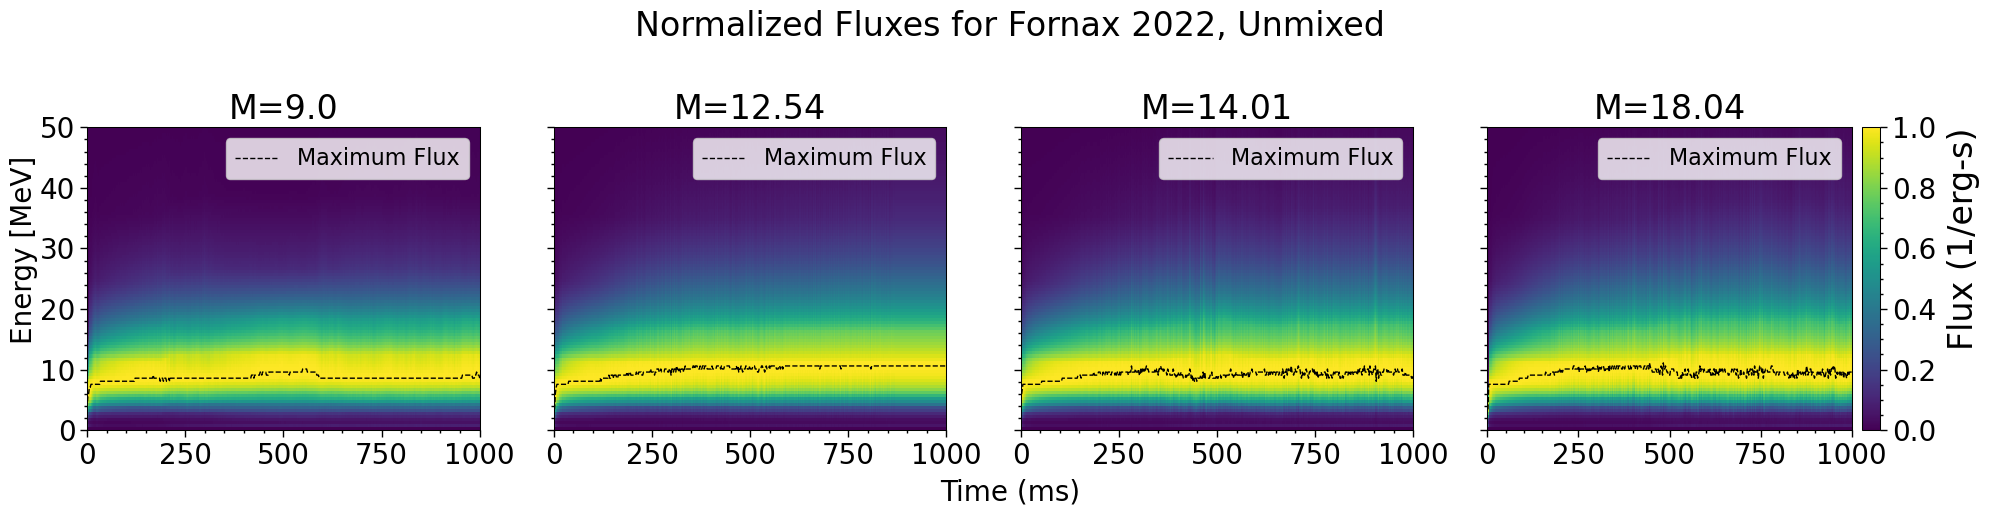

In [198]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

E_vals=np.linspace(0,50,100)
t_vals=np.linspace(0,1000,500)
fig, axes = plt.subplots(1,4, figsize=(20,5), sharex=True, sharey=True,tight_layout=True)

for i in range(4):
    ax=axes[i]
    mod=forn_models[i]
    T_flat, E_flat, normalized_fluxes_flat, max_energies = get_fluxes_fornax(t_vals,E_vals,mod)
    ax.hist2d(T_flat, E_flat, weights=normalized_fluxes_flat, bins=[500,100], cmap='viridis')
    hist = ax.hist2d(T_flat, E_flat, weights=normalized_fluxes_flat, bins=[500, 100], cmap='viridis')
    ax.plot(t_vals,max_energies,color='black',lw=1,ls='--',label='Maximum Flux')
    ax.set_title('M={}'.format(forn_params[i]['progenitor_mass'].value))
    ax.legend()

divider = make_axes_locatable(axes[-1])
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(hist[3], cax=cax, label='Flux (1/erg-s)')
        
fig.text(0.5, 0., 'Time (ms)', ha='center')
fig.text(0., 0.5, 'Energy [MeV]', va='center', rotation='vertical');
fig.suptitle('Normalized Fluxes for Fornax 2022, Unmixed')

C:\Users\sanya\AppData\Local\Temp\ipykernel_11052\3527477939.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax.hist2d(T_flat, E_flat, weights=normalized_fluxes_flat, bins=[500,100], cmap='viridis')
C:\Users\sanya\AppData\Local\Temp\ipykernel_11052\3527477939.py:20: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(hist[3], cax=cax, label='Flux (1/erg-s)')


Text(0.5, 0.98, 'Normalized Fluxes for Fornax 2022, QuantumDecoherence NMO')

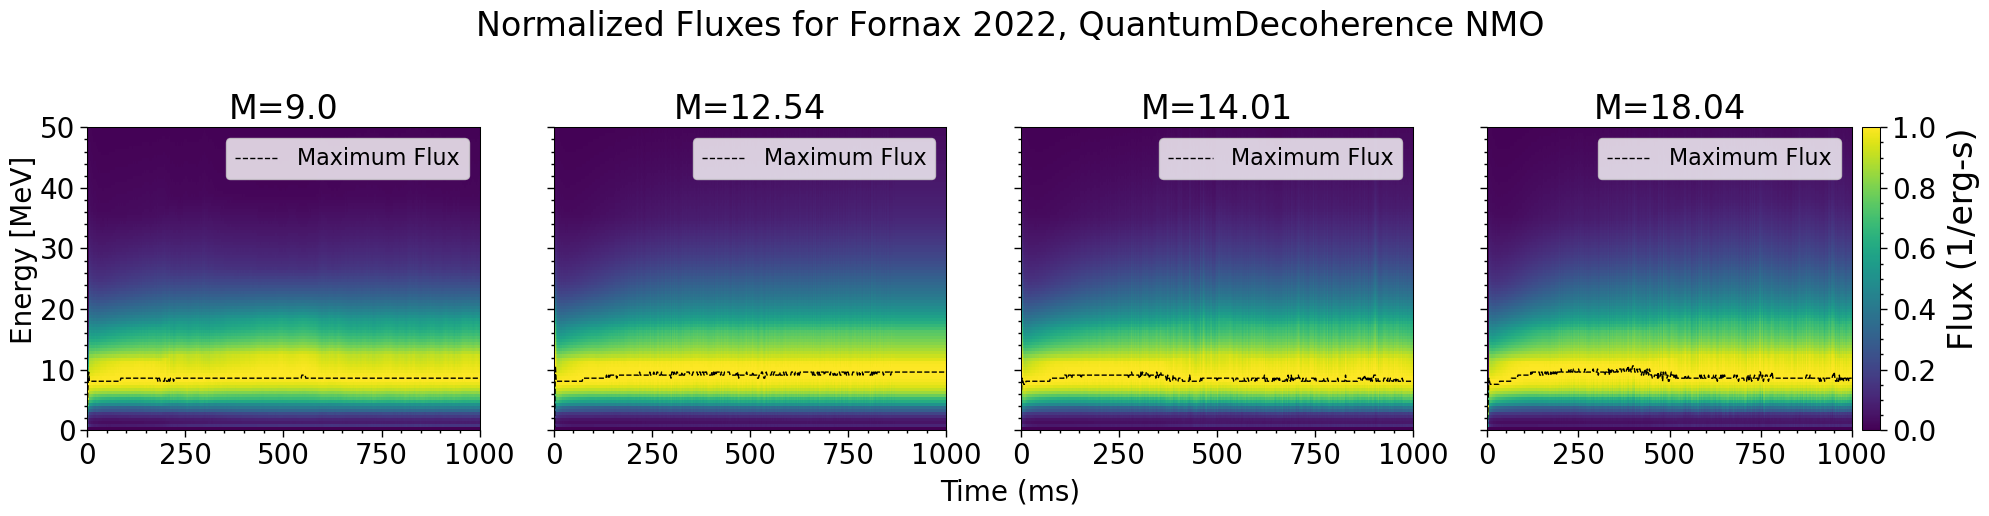

In [44]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

E_vals=np.linspace(0,50,100)
t_vals=np.linspace(0,1000,500)
fig, axes = plt.subplots(1,4, figsize=(20,5), sharex=True, sharey=True,tight_layout=True)

for i in range(4):
    ax=axes[i]
    mod=forn_models[i]
    T_flat, E_flat, normalized_fluxes_flat, max_energies = get_transformed_fluxes_fornax(t_vals,E_vals,mod,
                                                                                         QuantumDecoherence())
    ax.hist2d(T_flat, E_flat, weights=normalized_fluxes_flat, bins=[500,100], cmap='viridis')
    hist = ax.hist2d(T_flat, E_flat, weights=normalized_fluxes_flat, bins=[500, 100], cmap='viridis')
    ax.plot(t_vals,max_energies,color='black',lw=1,ls='--',label='Maximum Flux')
    ax.set_title('M={}'.format(forn_params[i]['progenitor_mass'].value))
    ax.legend()

divider = make_axes_locatable(axes[-1])
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(hist[3], cax=cax, label='Flux (1/erg-s)')
        
fig.text(0.5, 0., 'Time (ms)', ha='center')
fig.text(0., 0.5, 'Energy [MeV]', va='center', rotation='vertical');
fig.suptitle('Normalized Fluxes for Fornax 2022, QuantumDecoherence NMO')

C:\Users\sanya\AppData\Local\Temp\ipykernel_75716\3341193864.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.hist2d(T_flat, E_flat, weights=fluxes_flat, bins=np.array(np.shape(spectra)), cmap='viridis')


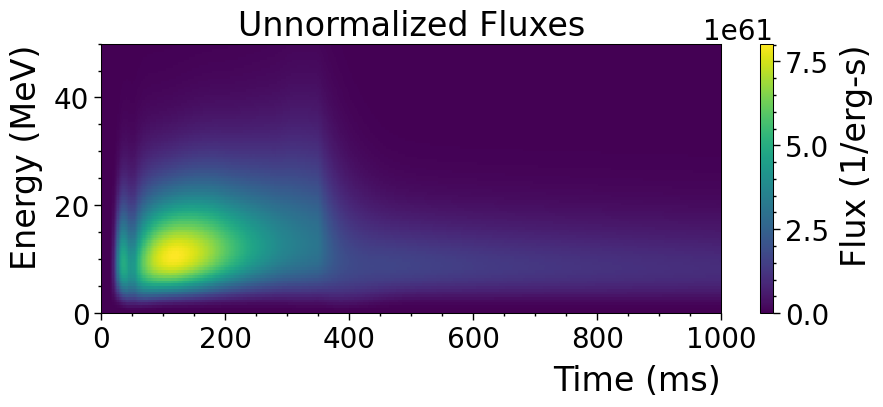

In [98]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
T, E = np.meshgrid(t_vals,E_vals)
T_flat = T.flatten()
E_flat = E.flatten()
fluxes_flat = spectra.T.flatten()
plt.figure(figsize=(10, 3.5))
plt.hist2d(T_flat, E_flat, weights=fluxes_flat, bins=np.array(np.shape(spectra)), cmap='viridis')
plt.colorbar(label='Flux (1/erg-s)')
plt.xlabel('Time (ms)')
plt.ylabel('Energy (MeV)')
plt.title('Unnormalized Fluxes')
plt.show()

In [67]:
max_fluxes = np.max(spectra, axis=1)  # Max flux along the energy axis (axis=1)

# Normalize the fluxes by the maximum flux for each time
normalized_fluxes = spectra / max_fluxes[:, np.newaxis]

C:\Users\sanya\AppData\Local\Temp\ipykernel_75716\3966212279.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.hist2d(T_flat, E_flat, weights=normalized_fluxes_flat, bins=np.array(np.shape(spectra)), cmap='viridis')


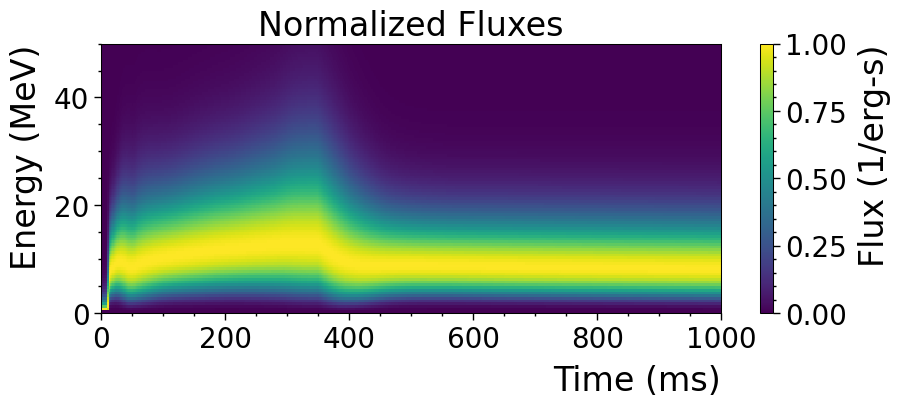

In [101]:
normalized_fluxes_flat=normalized_fluxes.T.flatten()
plt.figure(figsize=(10, 3.5))
plt.hist2d(T_flat, E_flat, weights=normalized_fluxes_flat, bins=np.array(np.shape(spectra)), cmap='viridis')
plt.colorbar(label='Flux (1/erg-s)')
plt.xlabel('Time (ms)')
plt.ylabel('Energy (MeV)')
plt.title('Normalized Fluxes')
plt.show()

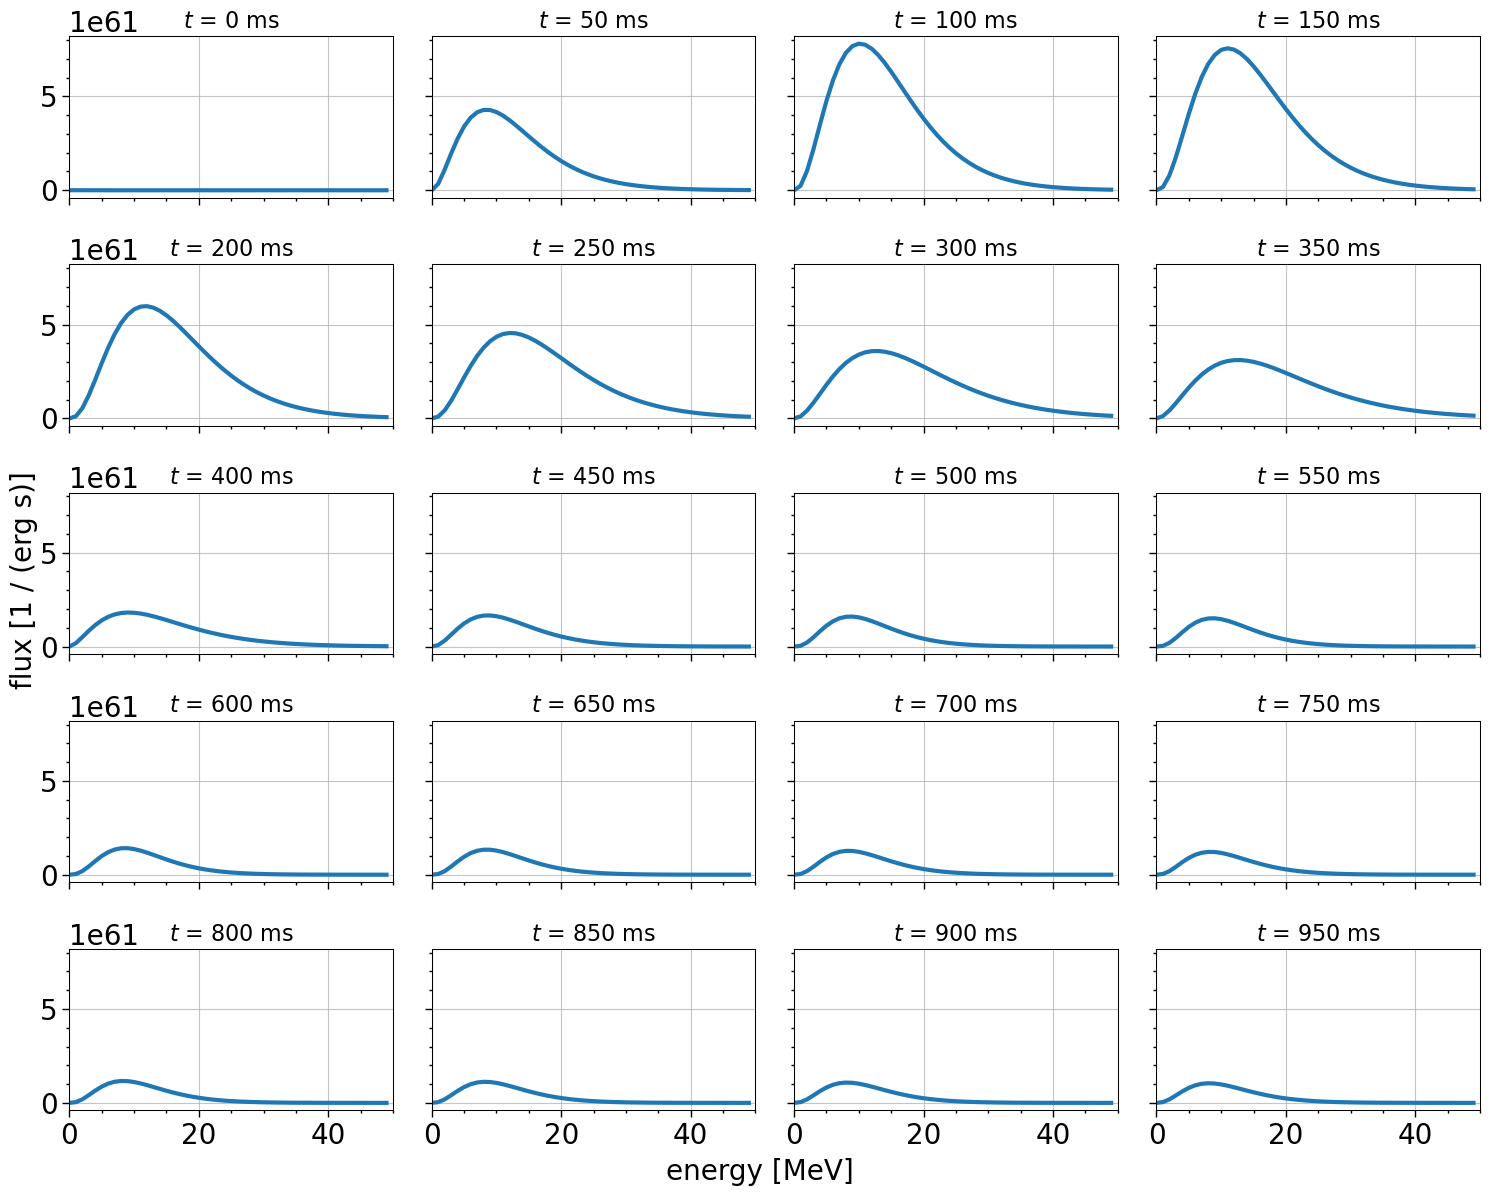

In [78]:
#model = models[23.43*u.solMass]

times1 = np.arange(0, 1000, 50) * u.ms
E = np.arange(0, 50, 1) * u.MeV

fig, axes = plt.subplots(5,4, figsize=(15,12), sharex=True, sharey=True, tight_layout=True)

#linestyles = ['-', '--', '-.', ':']

spectra = model.get_initial_spectra(times1, E)

for i, ax in enumerate(axes.flatten()):
    ax.plot(E, spectra[Flavor(2)][i], lw=3)
    ax.set(xlim=(0,50))
    ax.set_title('$t$ = {:g}'.format(times[i]), fontsize=16)
    
fig.text(0.5, 0., 'energy [MeV]', ha='center')
fig.text(0., 0.5, f'flux [{spectra[Flavor.NU_E].unit}]', va='center', rotation='vertical');

C:\Users\sanya\AppData\Local\Temp\ipykernel_75716\130568166.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.hist2d(T_flat, E_flat, weights=normalized_fluxes_flat, bins=[500, 100], cmap='viridis')


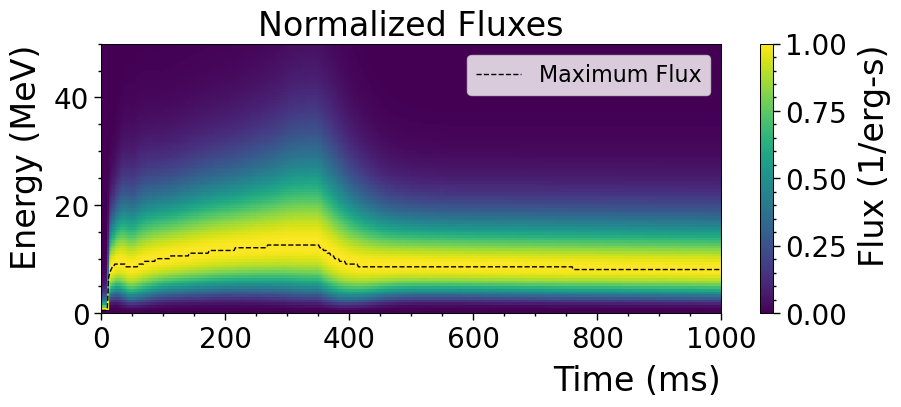

In [112]:
mean_fluxes = np.max(spectra, axis=1)

max_energies = np.zeros(t_vals.shape)

for i in range(spectra.shape[0]):
    closest_index = np.argmin(np.abs(spectra[i, :] - mean_fluxes[i]))
    max_energies[i] = E_vals[closest_index]

plt.figure(figsize=(10, 3.5))
plt.hist2d(T_flat, E_flat, weights=normalized_fluxes_flat, bins=[500, 100], cmap='viridis')
plt.colorbar(label='Flux (1/erg-s)')
plt.plot(times,mean_energies,color='black',lw=1,ls='--',label='Maximum Flux')
plt.xlabel('Time (ms)')
plt.ylabel('Energy (MeV)')
plt.title('Normalized Fluxes')
plt.legend()
plt.show()